In [1]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sbr
from pyspark.sql.functions import *
import os
from pyspark.sql import SparkSession
import findspark

In [2]:
mpl.rcParams["axes.formatter.limits"] = (-5, 12) #Evita notação ciencítica nos graficos
os.environ['url'] = 'jdbc:postgresql://localhost:5432/enem'
os.environ['user'] = 'postgres'
os.environ['password'] = 'senha'
os.environ['driver'] = 'org.postgresql.Driver'

In [3]:
spark = SparkSession \
    .builder \
    .appName('ENEM') \
    .master('local') \
    .config('spark.jars','postgresql-42.5.0.jar') \
    .getOrCreate()

F    2090526
M    1299306
Name: sexo, dtype: int64


<AxesSubplot: >

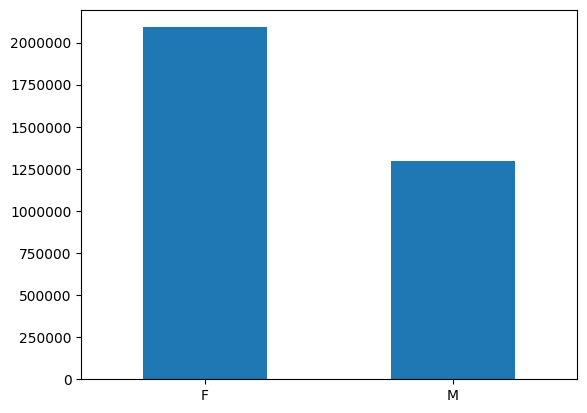

In [4]:
#Participantes por gênero
sexos = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', '(select sexo from participantes) as sexos') \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
sexos = sexos.toPandas()
sexos = sexos.sexo.value_counts()
print(sexos)
sexos.plot(kind='bar', rot=0)

18 anos               699365
17 anos               620784
19 anos               394689
Menor de 17 anos      274318
20 anos               250690
Entre 26 e 30 anos    227574
21 anos               177086
22 anos               132052
Entre 31 e 35 anos    130746
23 anos               100580
Entre 36 e 40 anos     93073
24 anos                85742
25 anos                71199
Entre 41 e 45 anos     58754
Entre 46 e 50 anos     35808
Entre 51 e 55 anos     20564
Entre 56 e 60 anos     10804
Entre 61 e 65 anos      4102
Entre 66 e 70 anos      1342
Maior de 70 anos         560
Name: descricao, dtype: int64


<AxesSubplot: >

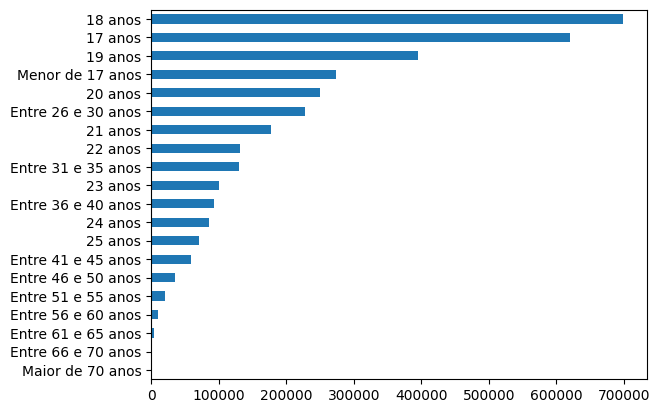

In [5]:
#Participantes por faixa etária
query = '(select faixas_etarias.descricao from participantes join faixas_etarias on faixas_etarias.id = participantes.fk_faixa_etaria) as faixas_etarias'
faixas_etarias = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
faixas_etarias = faixas_etarias.toPandas()
faixas_etarias = faixas_etarias.descricao.value_counts()
print(faixas_etarias)
faixas_etarias[::-1].plot(kind='barh')

Solteiro(a)                                2995915
Casado(a)/Mora com companheiro(a)           196285
Não informado                               139630
Divorciado(a)/Desquitado(a)/Separado(a)      54141
Viúvo(a)                                      3861
Name: descricao, dtype: int64


<AxesSubplot: >

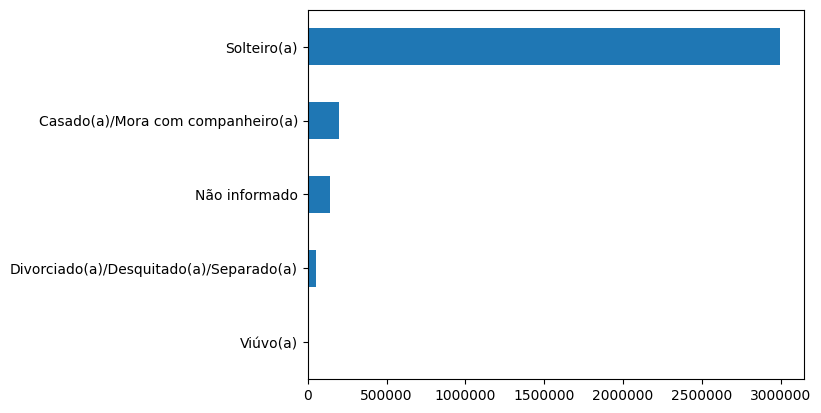

In [6]:
#Participantes por estado civil
query = '(select estados_civis.descricao from participantes join estados_civis on estados_civis.id = participantes.fk_estado_civil) as d'
estados_civis = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
estados_civis = estados_civis.toPandas()
estados_civis = estados_civis.descricao.value_counts()
print(estados_civis)
estados_civis[::-1].plot(kind='barh')

Parda                       1457454
Branca                      1362256
Preta                        411302
Não declarado                 71149
Amarela                       68491
Indígena                      19175
Não dispõe da informação          5
Name: descricao, dtype: int64


<AxesSubplot: >

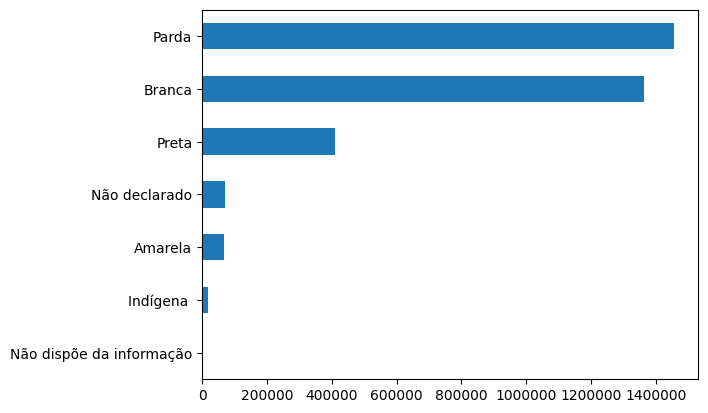

In [7]:
#Participantes por raca
query = '(select racas.descricao from participantes join racas on racas.id = participantes.fk_raca) as d'
racas = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
racas = racas.toPandas()
racas = racas.descricao.value_counts()
print(racas)
racas[::-1].plot(kind='barh')

Já concluí o Ensino Médio                               1789372
Estou cursando e concluirei o Ensino Médio em 2021      1150857
Estou cursando e concluirei o Ensino Médio após 2021     437190
Não concluí e não estou cursando o Ensino Médio           12413
Name: descricao, dtype: int64


<AxesSubplot: >

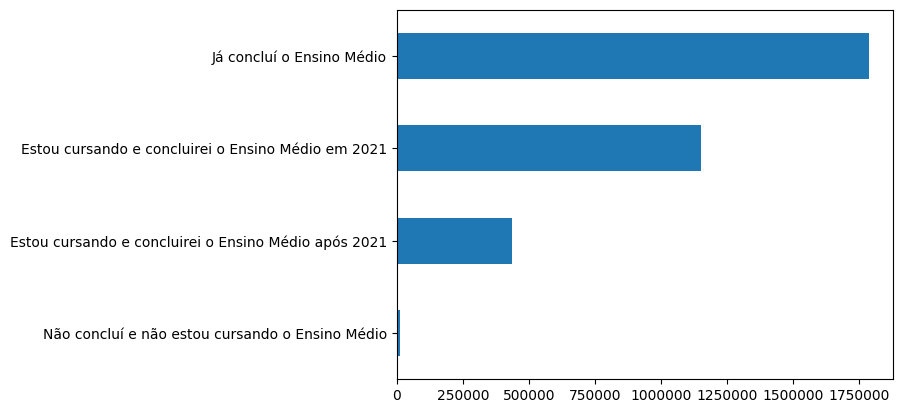

In [8]:
#Participantes por conclusao do ensino medio
query = '(select conclusao_em.descricao from participantes join conclusao_em on conclusao_em.id = participantes.fk_conclusao_em) as d'
conclusao_em = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
conclusao_em = conclusao_em.toPandas()
conclusao_em = conclusao_em.descricao.value_counts()
print(conclusao_em)
conclusao_em[::-1].plot(kind='barh')

Não Respondeu    2238977
Pública           958611
Privada           192244
Name: descricao, dtype: int64


<AxesSubplot: >

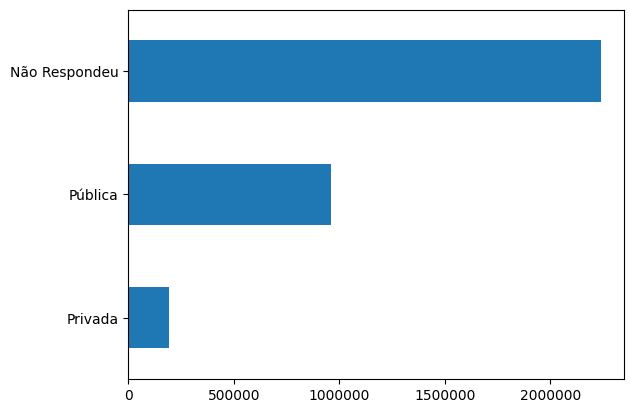

In [9]:
#Participantes por conclusao do tipo de escola
query = '(select tipo_escola.descricao from participantes join tipo_escola on tipo_escola.id = participantes.fk_tipo_escola) as d'
tipo_escola = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
tipo_escola = tipo_escola.toPandas()
tipo_escola = tipo_escola.descricao.value_counts()
print(tipo_escola)
tipo_escola[::-1].plot(kind='barh')

Não Respondeu                                  2293004
Ensino Regular                                 1089923
Educação Especial - Modalidade Substitutiva       6905
Name: descricao, dtype: int64


<AxesSubplot: >

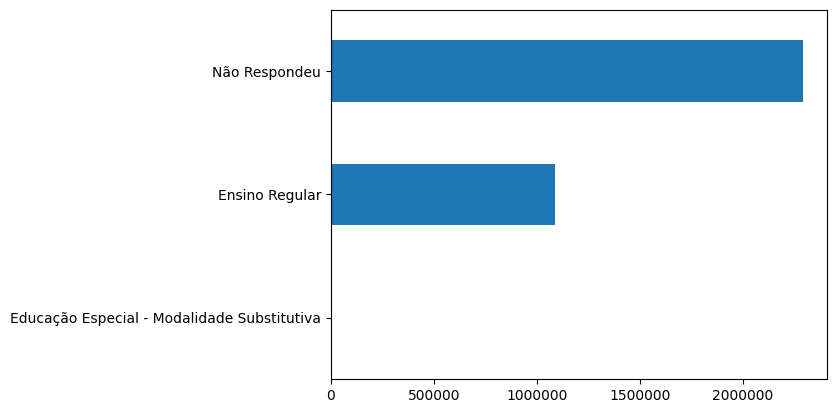

In [10]:
#Participantes por conclusao do tipo de ensino
query = '(select tipo_ensino.descricao from participantes join tipo_ensino on tipo_ensino.id = participantes.fk_tipo_ensino) as d'
tipo_ensino = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
tipo_ensino = tipo_ensino.toPandas()
tipo_ensino = tipo_ensino.descricao.value_counts()
print(tipo_ensino)
tipo_ensino[::-1].plot(kind='barh')

False    2952642
True      437190
Name: treineiro, dtype: int64


<AxesSubplot: >

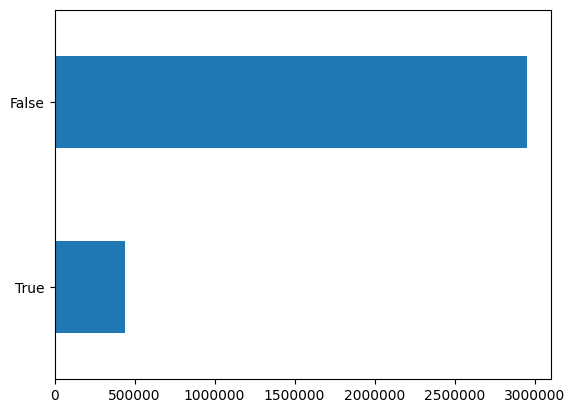

In [11]:
#Participantes por treineiro
query = '(select treineiro from participantes) as d'
treineiro = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
treineiro = treineiro.toPandas()
treineiro = treineiro.treineiro.value_counts()
print(treineiro)
treineiro[::-1].plot(kind='barh')

In [12]:
#Participantes por presenca nas provas
query = '''(select presenca_prova_cn.descricao as presenca_cn, presenca_prova_ch.descricao as presenca_ch,
     presenca_prova_lc.descricao as presenca_lc, presenca_prova_mt.descricao as presenca_mt
from participantes
join presenca_prova_cn on presenca_prova_cn.id = participantes.fk_presenca_prova_cn
join presenca_prova_ch on presenca_prova_ch.id = participantes.fk_presenca_prova_ch 
join presenca_prova_lc on presenca_prova_lc.id = participantes.fk_presenca_prova_lc
join presenca_prova_mt on presenca_prova_mt.id = participantes.fk_presenca_prova_mt) as d'''
presenca_provas = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
presenca_provas = presenca_provas.toPandas()
presenca_provas.value_counts()

presenca_cn         presenca_ch         presenca_lc         presenca_mt       
Presente na prova   Presente na prova   Presente na prova   Presente na prova     2238107
Faltou à prova      Faltou à prova      Faltou à prova      Faltou à prova        1000150
                    Presente na prova   Presente na prova   Faltou à prova         138851
Presente na prova   Faltou à prova      Faltou à prova      Presente na prova        7229
Faltou à prova      Eliminado na prova  Eliminado na prova  Faltou à prova           3538
Eliminado na prova  Presente na prova   Presente na prova   Eliminado na prova       1421
Presente na prova   Eliminado na prova  Eliminado na prova  Presente na prova         508
Eliminado na prova  Faltou à prova      Faltou à prova      Eliminado na prova         18
                    Eliminado na prova  Eliminado na prova  Eliminado na prova         10
dtype: int64

C:\Users\Rafael\AppData\Local\Temp\ipykernel_984\1120720272.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  notas = notas_provas[notas_provas.nota_cn > 0][notas_provas.nota_ch > 0][notas_provas.nota_lc > 0] \


<AxesSubplot: xlabel='nota_mt', ylabel='Density'>

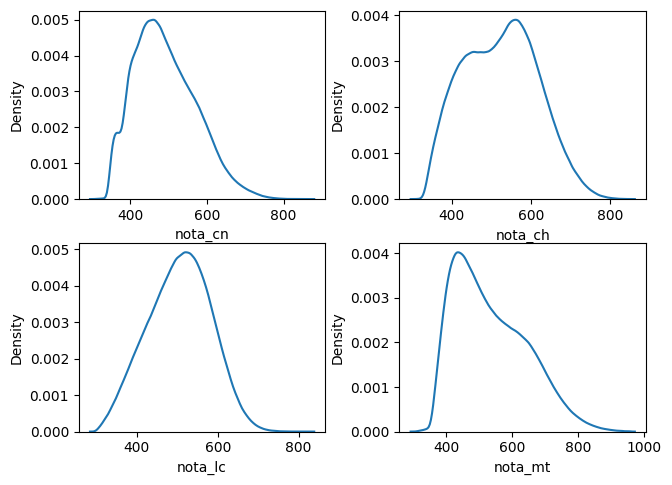

In [5]:
#Notas
query = '''(select nota_cn, nota_ch, nota_lc, nota_mt, sexo
from resultados_provas_objetivas as r
join participantes on participantes.pk_numero_inscricao = r.fk_numero_inscricao) as d'''
notas_provas = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
notas_provas = notas_provas.toPandas()

notas = notas_provas[notas_provas.nota_cn > 0][notas_provas.nota_ch > 0][notas_provas.nota_lc > 0] \
    [notas_provas.nota_mt > 0]
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.kdeplot(notas.nota_cn, ax=ax1)
sbr.kdeplot(notas.nota_ch, ax=ax2)
sbr.kdeplot(notas.nota_lc, ax=ax3)
sbr.kdeplot(notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_redacao', ylabel='Density'>

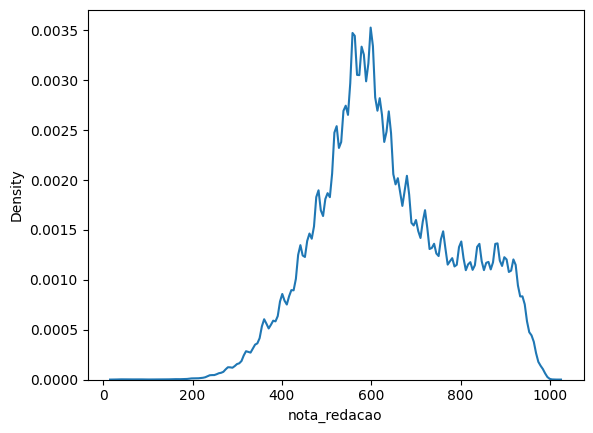

In [4]:
#Notas redações
query = '''(select fk_situacao_redacao, nota_redacao
from redacoes) as d'''
redacoes = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
redacoes = redacoes.toPandas()

redacoes = redacoes[redacoes.fk_situacao_redacao == 1]
sbr.kdeplot(redacoes.nota_redacao)

In [38]:
#Notas redações
query = '''(select fk_situacao_redacao, nota_redacao, sigla_uf
from redacoes
join participantes on participantes.pk_numero_inscricao = redacoes.fk_numero_inscricao
join municipios on municipios.pk_codigo_municipio = participantes.fk_local_aplicacao_prova) as d'''
redacoes_municipios = spark.read.format('jdbc') \
    .option('url', os.getenv('url')) \
    .option('dbtable', query) \
    .option('driver', os.getenv('driver')) \
    .option('user', os.getenv('user')).option('password', os.getenv('password')).load()
redacoes_municipios = redacoes_municipios.toPandas()

redacoes_municipios = redacoes_municipios[redacoes_municipios.fk_situacao_redacao == 1] #1 significa que a redação não foi desqualificada

<AxesSubplot: xlabel='nota_redacao', ylabel='sigla_uf'>

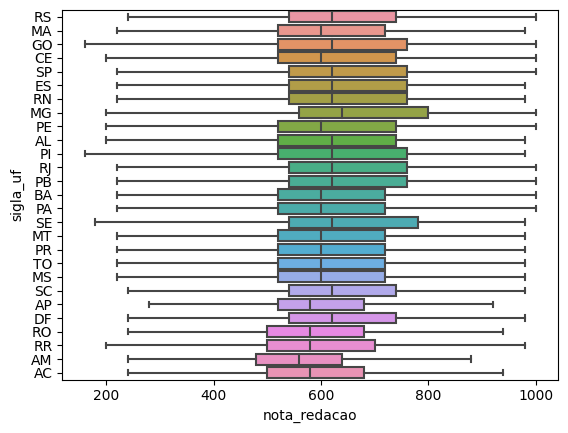

In [48]:
sbr.boxplot(x=redacoes_municipios.nota_redacao, y=redacoes_municipios.sigla_uf, showfliers=False)

<AxesSubplot: xlabel='nota_redacao', ylabel='nota_mt'>

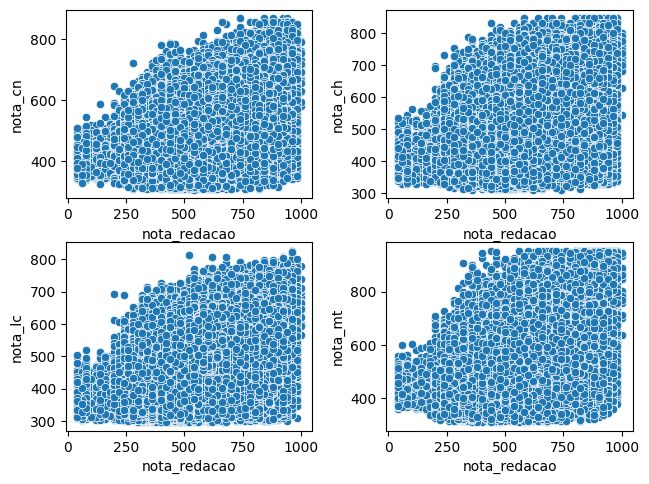

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.scatterplot(x=redacoes.nota_redacao, y=notas.nota_cn, ax=ax1)
sbr.scatterplot(x= redacoes.nota_redacao, y=notas.nota_ch, ax=ax2)
sbr.scatterplot(x= redacoes.nota_redacao, y=notas.nota_lc, ax=ax3)
sbr.scatterplot(x= redacoes.nota_redacao, y=notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_cn', ylabel='nota_mt'>

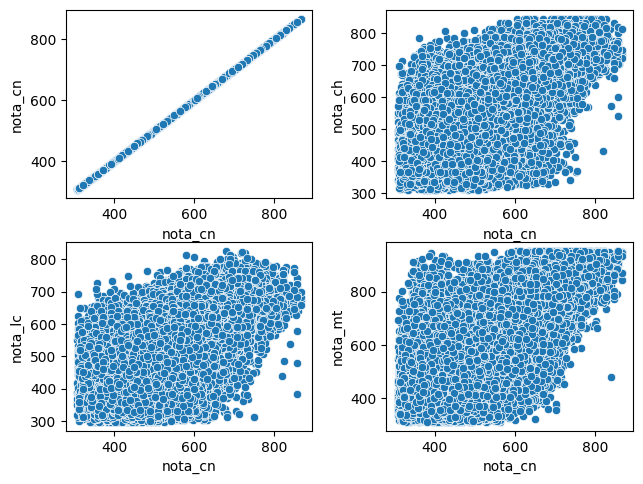

In [66]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.scatterplot(x= notas.nota_cn, y=notas.nota_cn, ax=ax1)
sbr.scatterplot(x= notas.nota_cn, y=notas.nota_ch, ax=ax2)
sbr.scatterplot(x= notas.nota_cn, y=notas.nota_lc, ax=ax3)
sbr.scatterplot(x= notas.nota_cn, y=notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_ch', ylabel='nota_mt'>

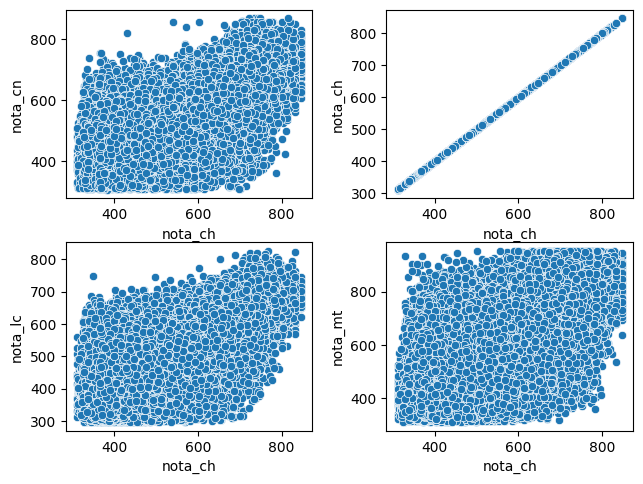

In [67]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.scatterplot(x= notas.nota_ch, y=notas.nota_cn, ax=ax1)
sbr.scatterplot(x= notas.nota_ch, y=notas.nota_ch, ax=ax2)
sbr.scatterplot(x= notas.nota_ch, y=notas.nota_lc, ax=ax3)
sbr.scatterplot(x= notas.nota_ch, y=notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_lc', ylabel='nota_mt'>

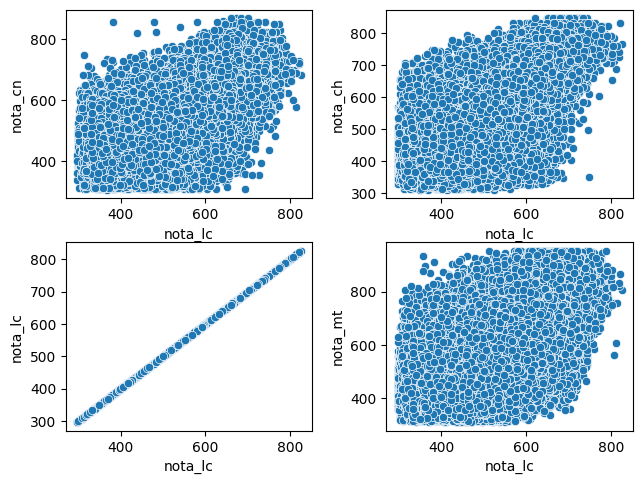

In [68]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.scatterplot(x= notas.nota_lc, y=notas.nota_cn, ax=ax1)
sbr.scatterplot(x= notas.nota_lc, y=notas.nota_ch, ax=ax2)
sbr.scatterplot(x= notas.nota_lc, y=notas.nota_lc, ax=ax3)
sbr.scatterplot(x= notas.nota_lc, y=notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_mt', ylabel='nota_mt'>

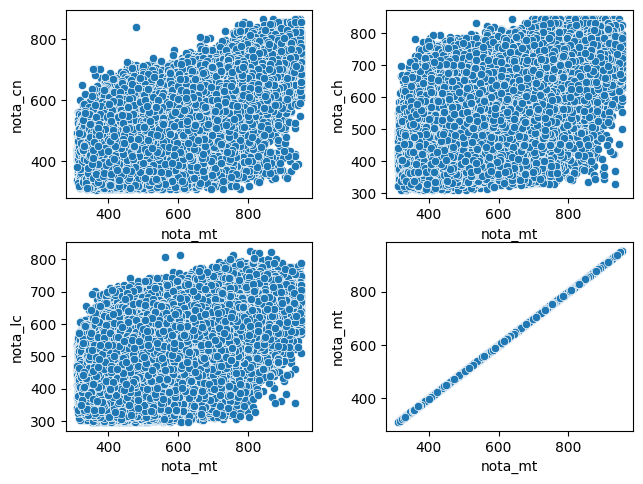

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.tight_layout()
fig.subplots_adjust(wspace=0.3)
sbr.scatterplot(x= notas.nota_mt, y=notas.nota_cn, ax=ax1)
sbr.scatterplot(x= notas.nota_mt, y=notas.nota_ch, ax=ax2)
sbr.scatterplot(x= notas.nota_mt, y=notas.nota_lc, ax=ax3)
sbr.scatterplot(x= notas.nota_mt, y=notas.nota_mt, ax=ax4)

<AxesSubplot: xlabel='nota_mt', ylabel='sexo'>

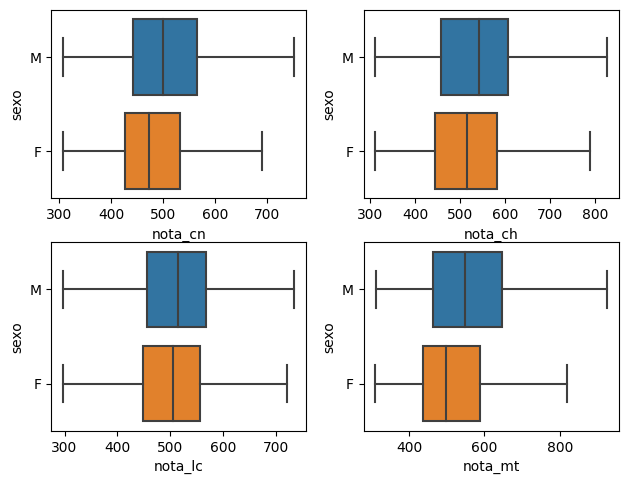

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.subplots_adjust(wspace=0.3)
fig.tight_layout()
sbr.boxplot(x=notas.nota_cn, y=notas.sexo, ax=ax1, showfliers=False)
sbr.boxplot(x=notas.nota_ch, y=notas.sexo, ax=ax2, showfliers=False)
sbr.boxplot(x=notas.nota_lc, y=notas.sexo, ax=ax3, showfliers=False)
sbr.boxplot(x=notas.nota_mt, y=notas.sexo, ax=ax4, showfliers=False)

<AxesSubplot: xlabel='nota_mt', ylabel='Density'>

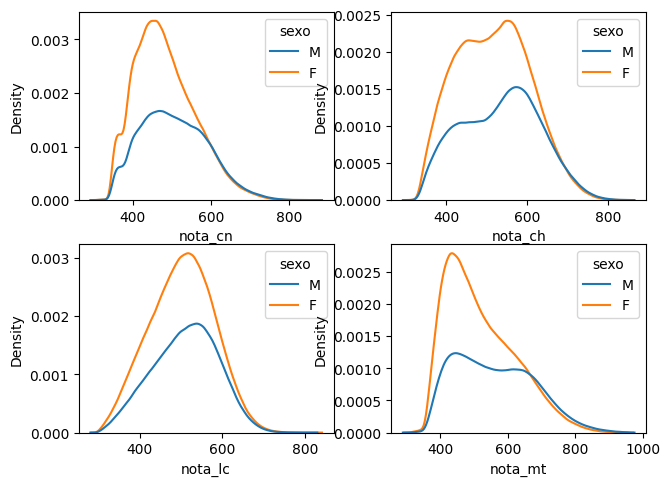

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = mpl.subplots(2,2)
fig.subplots_adjust(wspace=1)
fig.tight_layout()
sbr.kdeplot( x=notas.nota_cn, hue=notas.sexo, ax=ax1)
sbr.kdeplot( x=notas.nota_ch, hue=notas.sexo, ax=ax2)
sbr.kdeplot( x=notas.nota_lc, hue=notas.sexo, ax=ax3)
sbr.kdeplot( x=notas.nota_mt, hue=notas.sexo, ax=ax4)